In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import pylab

sns.set()
plt.rcParams['figure.figsize'] = (20, 5)

import warnings
warnings.filterwarnings('ignore')

In [32]:
data = pd.read_csv('../data/yt_series/Index2018.csv', parse_dates=['date'], index_col=0)
data

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,469.900000,2224.95,3445.980000,18124.01
1994-10-01,475.270000,2225.00,3440.580000,18443.44
1994-11-01,474.130000,2228.10,3413.770000,18485.25
1994-12-01,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


### QQ-Plots

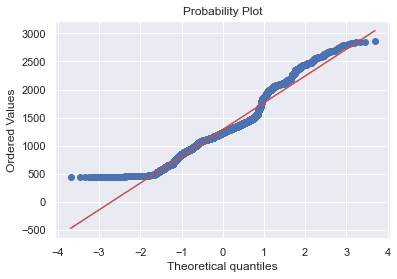

In [7]:
stats.probplot(data.spx, plot=pylab)
pylab.show()

### White noise

Sequence of random data where each value has a time-period associated with it. Data is considered to be white noise if it satisfies three conditions:
1. has constant mean (0)
2. has constant std
3. has no autocorrelation (this shows how the data is correlated to the previous timestamp). Here it means that there's no clear relationship between past and present values.

---

Why is white noise important? If the residuals (predicted - true vals) look like random noise - the model is not predictable. On the opposite side, there’s a better model for your dataset if there are visible patterns in the residuals.


---

Three ways to visualize white noise (and spot them in the dataset):
1. plot the time-series
2. plot mean and std over time
3. examine autocorrelation plots


In [8]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.seasonal import seasonal_decompose

### 3 Sample white noise plots

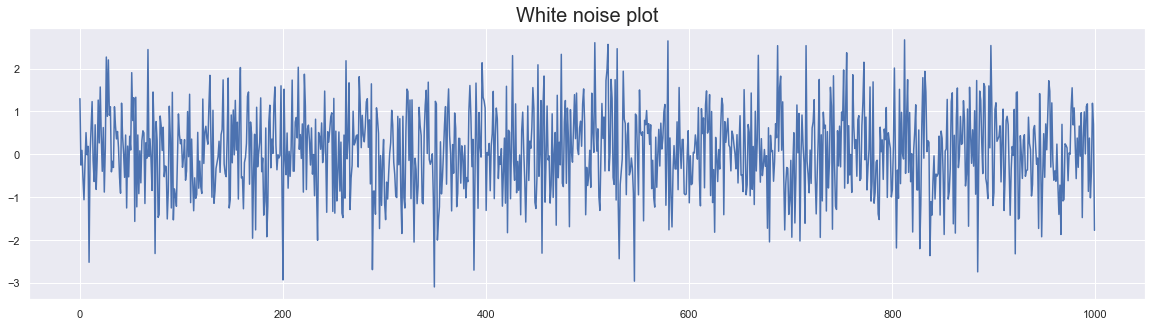

In [19]:
# 1. plot time series

# get data
norm = np.random.randn(1000)

# plot
plt.title('White noise plot', size=20)
plt.plot(np.arange(len(norm)), norm)
plt.show()

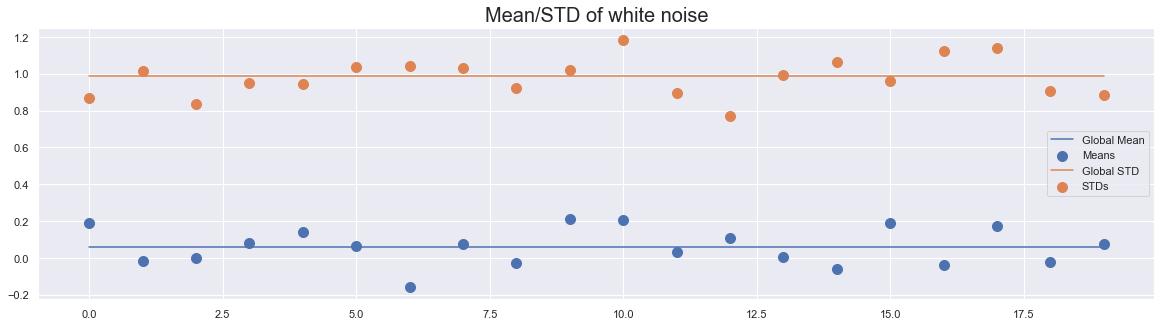

In [24]:
# 2. plot mean and std over time

chunks = np.split(norm, 20)
means, stds = [], []
seq = np.arange(20)

# get mean and std of each chunk
for chunk in chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

# plot
plt.title('Mean/STD of white noise', size=20)
plt.plot(seq, [norm.mean()] * len(means), label='Global Mean', lw=1.5)
plt.scatter(x=seq, y=means, label='Means', s=100)
plt.plot(seq, [norm.std()] * len(stds), label='Global STD', lw=1.5)
plt.scatter(x=seq, y=stds, label='STDs', s=100)
plt.legend()
plt.show()

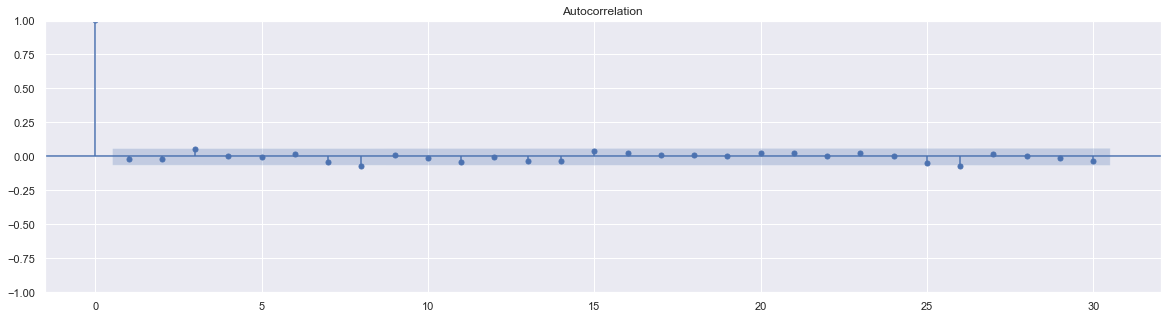

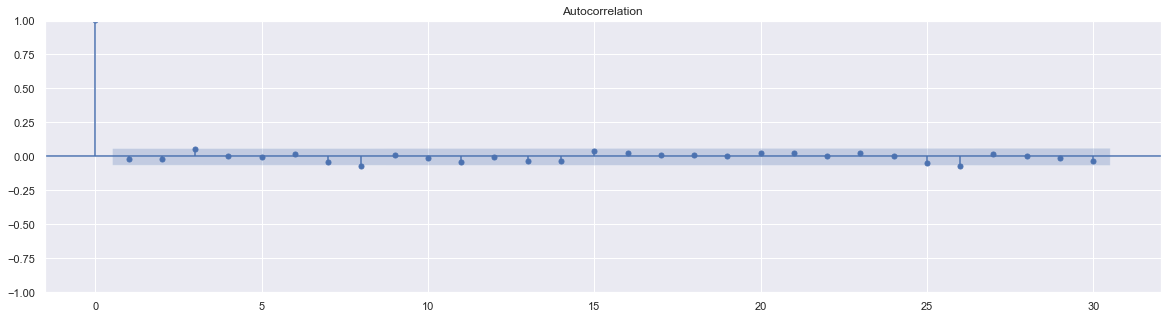

In [25]:
# 3. examine autocorrelation plots

sgt.plot_acf(np.array(norm))

### Real dataset

In [12]:
data.head(3)

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,469.90,2224.95,3445.98,18124.01
1994-10-01,475.27,2225.00,3440.58,18443.44
1994-11-01,474.13,2228.10,3413.77,18485.25


In [13]:
temp = data.copy()
temp = temp.asfreq('b')
temp.fillna(method='ffill', inplace=True)
temp.head(3)

,spx,dax,ftse,nikkei
date,,,,
1994-01-03,464.44,2056.61,3270.6,20216.62
1994-01-04,445.77,2142.88,3086.4,19277.16
1994-01-05,445.77,2142.88,3086.4,19277.16


#### Remove surplus data

In [14]:
temp['market_value'] = temp.spx
temp.drop(['spx', 'dax', 'ftse', 'nikkei'], axis='columns', inplace=True)

size = int(len(temp) * .8)
df, df_test = temp.iloc[:size], temp.iloc[size:]

print(len(df), len(df_test))

5200 1300


#### White noise

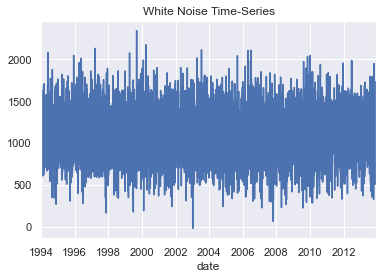

In [15]:
wn = np.random.normal(loc=df.market_value.mean(), scale=df.market_value.std(), size=len(df))
df['wn'] = wn

df['wn'].plot(title='White Noise Time-Series')
plt.show()

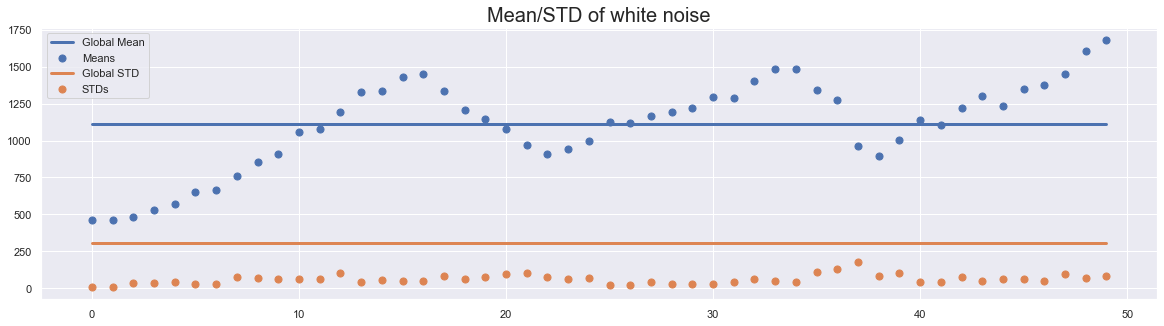

In [31]:
# 2. plot mean and std over time
chunks = np.split(df['market_value'], 50)
means, stds = [], []
seq = np.arange(50)

# get mean and std of each chunk
for chunk in chunks:
    means.append(np.mean(chunk))
    stds.append(np.std(chunk))

# plot
plt.title('Mean/STD of white noise', size=20)
plt.plot(seq, [df['market_value'].mean()] * len(means), label='Global Mean', lw=3)
plt.scatter(x=seq, y=means, label='Means', s=50)

plt.plot(seq, [df['market_value'].std()] * len(stds), label='Global STD', lw=3)
plt.scatter(x=seq, y=stds, label='STDs', s=50)
plt.legend()
plt.show()

## Random Walk


In [37]:
walk = pd.read_csv('../data/yt_series/rand_walk.csv', parse_dates=['date'], index_col=0)
walk = walk.asfreq('b')
walk

,price
date,
1994-01-03,1193.551570
1994-01-04,1078.340980
1994-01-05,1133.580682
1994-01-06,1231.426778
1994-01-07,1231.997040
...,...
2013-11-27,NaN
2013-11-28,NaN
2013-11-29,NaN


In [38]:
walk.describe()

,price
count,5020.000000
mean,1270.104756
std,444.064313
min,574.382397
25%,932.331267
50%,1157.158604
75%,1488.403748
max,2715.508720


In [41]:
df['rw'] = walk['price']
df.head(3)

,market_value,wn,rw
date,,,
1994-01-03,464.44,1214.344041,1193.551570
1994-01-04,445.77,1015.159500,1078.340980
1994-01-05,445.77,1621.222286,1133.580682


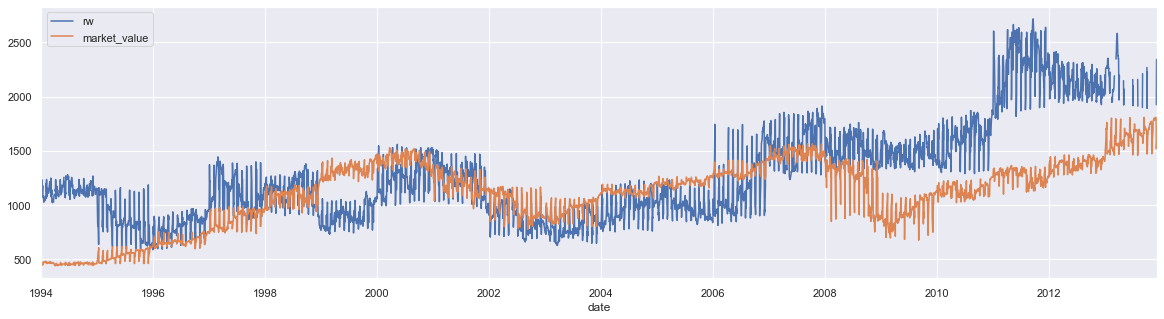

In [44]:
df['rw'].plot()
df['market_value'].plot()
plt.legend()
plt.show()

## Stationarity
- constant mean, variance, covariance (e.g., cov(x1, x4) = cov(x3, x6))
- example of it is white noise (whereas random walk IS NOT)


### Dickey-Fuller test

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose

sts.adfuller(df.market_value)

(-1.1341289129405696,
 0.7012716243121828,
 23,
 5176,
 {'1%': -3.4316140158442305,
  '5%': -2.8620985625001385,
  '10%': -2.56706732277764},
 53804.99535377538)